In [169]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [170]:
def initialisation(n0, n1, n2=2):
    # Weight matrix from input to first hidden layer
    W1 = np.random.randn(n1, n0)
    b1 = np.random.randn(n1, 1)   # Bias vector for first hidden layer
    # Weight matrix from first hidden layer to output layer
    W2 = np.random.randn(n2, n1)
    b2 = np.random.randn(n2, 1)   # Bias vector for output layer

    parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parameters

In [171]:
def forward_propagation(X, parameters):

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1, X) + b1  # Ensure that W1 is (n1, n0) and X is (n0, m)
    A1 = 1 / (1 + np.exp(-Z1))
    Z2 = np.dot(W2, A1) + b2  # Ensure that W2 is (n2, n1) and A1 is (n1, m)
    A2 = 1 / (1 + np.exp(-Z2))

    activations = {
        'A1': A1,
        'A2': A2
    }
    return activations

In [172]:
def log_loss(A, y):
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [173]:
def back_propagation(X, y, activations, parameters):

    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parameters['W2']

    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {
        'dW1': dW1,
        'db1': db1,
        'dW2': dW2,
        'db2': db2,
    }

    return gradients

In [174]:
def update(gradients, parameters, learning_rate):

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parameters

In [175]:
def predict(X, parameters):
    activations = forward_propagation(X, parameters)
    A2 = activations['A2']
    predictions = np.argmax(A2, axis=0)  # Get the predicted class index
    return predictions

In [176]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [177]:
from tqdm import tqdm
import matplotlib.pyplot as plt


def neural_network(X_train, y_train, n1, learning_rate=0.01, n_iter=100):
    # initialize W,b
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    parameters = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []

    # Training iteration loop
    for i in tqdm(range(n_iter), desc='Training progress'):
        activations = forward_propagation(X_train, parameters)
        gradients = back_propagation(X_train, y_train, activations, parameters)
        # Update the entire parameters dictionary
        parameters = update(gradients, parameters, learning_rate)

        if i % 10 == 0:
            # Train
            train_loss.append(log_loss(activations['A2'], y_train))
            # Assuming y_train is one-hot encoded with shape (2, number_of_samples)
            # Convert from one-hot encoding to class indices
            y_true = np.argmax(y_train, axis=0)
            # Get predictions for the training set
            # Should return a 1D array of shape (number_of_samples,)
            y_pred = predict(X_train, parameters)
            # Calculate accuracy
            current_accuracy = accuracy_score(y_true, y_pred)
            train_acc.append(current_accuracy)

    # Plotting the loss
    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.title("Loss over Iteractions")
    plt.legend

    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train accuracy')
    plt.title("Accuracy over Iteractions")
    plt.legend()
    plt.show()

    return parameters

CAT VS DOG APPLICATION

In [178]:
import h5py


def load_data():
    # Load training dataset
    train_dataset = h5py.File('trainset.hdf5', 'r')
    X_train = np.array(train_dataset["X"][:])  # Features for the training set
    y_train = np.array(train_dataset["y"][:])  # Labels for the training set

    # Load test dataset
    test_dataset = h5py.File('testset.hdf5', 'r')
    X_test = np.array(test_dataset["X"][:])  # Features for the test set
    y_test = np.array(test_dataset["y"][:])  # Labels for the test set

    return X_train, y_train, X_test, y_test

In [179]:
X_train, y_train, X_test, y_test = load_data()

In [180]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(23998, 64, 64, 3)
(23998, 2)
(array([0, 1]), array([23998, 23998], dtype=int64))


In [181]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(1000, 64, 64, 3)
(1000, 2)
(array([0, 1]), array([1000, 1000], dtype=int64))


<function matplotlib.pyplot.show(close=None, block=None)>

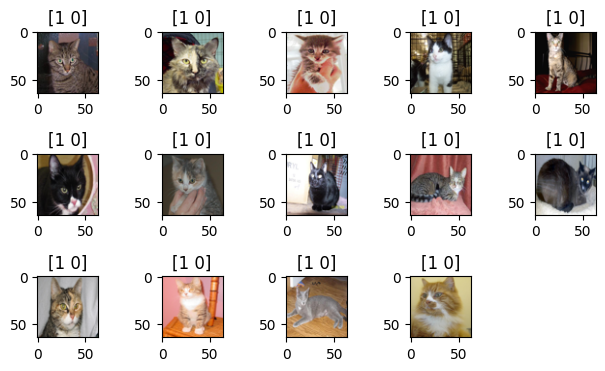

In [182]:
plt.figure(figure=(16, 8))
for i in range(1, 15):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show

In [183]:
# Reshaping the training and testing images
# Original shape: (23998, 64, 64, 3), where there are 23998 images, each of size 64x64 pixels with 3 color channels
# New shape: (23998, 12288), where each image is flattened into a single vector of size 64 * 64 * 3 = 12288
# This conversion simplifies the input for machine learning models, turning each 2D image into a 1D array, making the dataset two-dimensional.

# We normalize the data by dividing by X_train.max()
X_train_reshape = X_train.reshape(X_train.shape[0], -1) / X_train.max()
X_test_reshape = X_test.reshape(X_test.shape[0], -1) / X_train.max()

In [184]:
# Transpose to ensure that columns represent individual examples
X_train_reshape = X_train_reshape.T  # Transpose to shape (12288, 23998)
X_test_reshape = X_test_reshape.T    # Transpose to shape (12288, 1000)

In [185]:
X_train_reshape.max()

1.0

In [186]:
X_test_reshape.max()

1.0

In [187]:
# If y_train and y_test are not already in the shape (number_of_classes, number_of_examples), transpose them as well
y_train = y_train.T  # Should be of shape (2, 23998) if one-hot encoded
y_test = y_test.T    # Should be of shape (2, 1000) if one-hot encoded

Training progress: 100%|██████████| 10000/10000 [1:12:30<00:00,  2.30it/s]


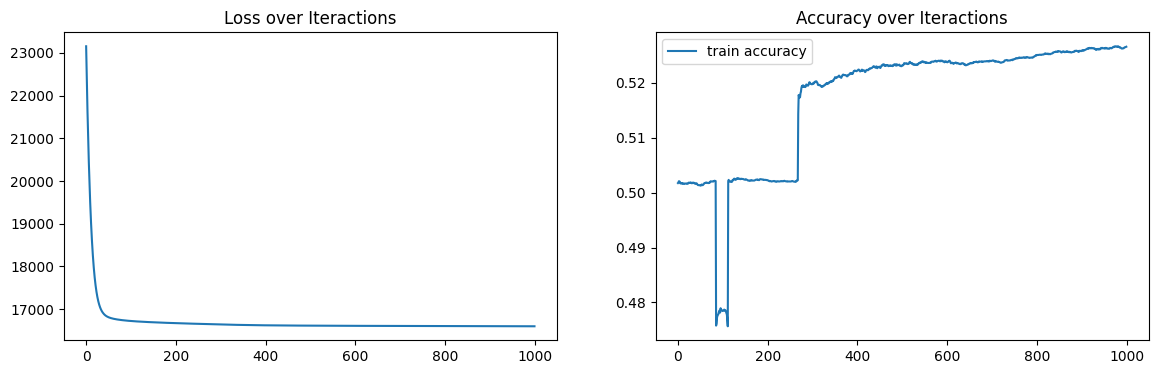

In [188]:
parameters = neural_network(
    X_train_reshape, y_train, 2, learning_rate=0.01, n_iter=10000)

In [190]:
# Predict the classes for the testing set
y_pred_test = predict(X_test_reshape, parameters)

# If y_test is one-hot encoded, you need to convert it to class indices
# Assuming y_test is one-hot encoded with shape (2, number_of_samples)
# Convert from one-hot encoding to class indices
y_true_test = np.argmax(y_test, axis=0)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_true_test, y_pred_test)

print(f"Accuracy on the test set: {test_accuracy * 100: .2f}%")

Accuracy on the test set:  51.10%


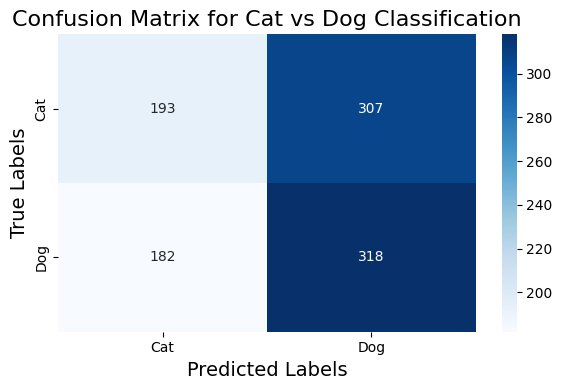

In [195]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_true_test, y_pred_test)

# Define the class names if you have them
class_names = ['Cat', 'Dog']

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, cbar=True)

# Add labels and title
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix for Cat vs Dog Classification', fontsize=16)

# Show the plot with a tight layout to ensure everything fits without overlap
plt.tight_layout()
plt.show()